In [1]:
import glob
import subprocess
from tqdm import tqdm
import multiprocessing
from time import sleep
import random

def gulp(input_path):
    sleep(random.random())
    run = True
    output_path = input_path[:-3] + 'out'
    try:
        with open(output_path) as f:
            file = f.read()
        if 'Job Finished at' in file:
            run = False
    except:
        pass
    if run:
        with open(input_path) as f:
            output_path = input_path[:-3] + 'out'
            with open(output_path, 'w') as o:
                try:
                    a = subprocess.run(['gulp'], stdin = f, stdout = o, timeout = None)
                except:
                    pass

all_cases = sorted(glob.glob('*.inp'), key = lambda x: x.split('/')[-1].split('.')[0])

complete = []

for case in all_cases:
    try:
        with open(case[:-3] + 'out', 'r') as f:
            g = f.read()
        if 'Final energy' in g:
            complete.append(case)
    except:
        pass

cases = [case for case in all_cases if case not in complete]

N = len(cases)

def update():
    pbar.update(1)

if __name__ == '__main__':
    with multiprocessing.Pool() as pool:
        for result in tqdm(pool.imap_unordered(gulp, cases), total=len(cases)):
            pass
    pool.close()
    pool.join()

100%|██████████| 8/8 [03:24<00:00, 25.60s/it]


In [10]:
import re
import glob
import collections

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

energy = energyList('*.out')
sorted_energy = collections.OrderedDict(sorted(energy.items()))

energies = sorted_energy.values()
defect = sorted_energy.keys()
defects = [x[:-4] for x in defect]

print(sorted_energy)

OrderedDict([('fix_large_super.out', -3.16638193), ('fix_large_unit.out', -3.16638351), ('fix_small_super.out', -3.12463925), ('fix_small_unit.out', -3.12463924), ('nofix_large_super.out', -3.29486805), ('nofix_large_unit.out', -3.29486786), ('nofix_small_super.out', -3.2607213), ('nofix_small_unit.out', -3.26072134)])


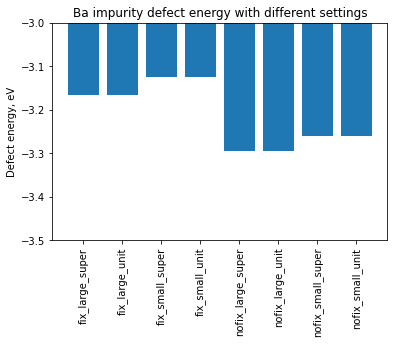

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(defects, energies)
plt.xticks(rotation='vertical')
plt.ylabel('Defect energy, eV')
plt.ylim(-3.5, -3)
plt.title('Ba impurity defect energy with different settings')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/energy_settings.jpg', bbox_inches='tight', dpi=500)